In [42]:
import numpy as np
import pandas as pd
import h5py
import os
import glob
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as md
import warnings
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
warnings.filterwarnings('ignore')
import scipy.ndimage as ndimage
from matplotlib import cm
from matplotlib.colors import LogNorm
from sklearn import preprocessing

In [43]:
filename = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220618_R2.h5"
f = h5py.File(filename, 'r')
day7 = np.array(f["DataProducts"])
day7

array(['1064_aer_dep', '1064_aer_dep_cloud_screened',
       '1064_aer_dep_syst_unc', '1064_bsc', '1064_bsc_Sa',
       '1064_bsc_cloud_screened', '1064_bsr', '1064_bsr_cloud_screened',
       '1064_dep', '1064_dep_cloud_screened', '1064_ext',
       '1064_total_attn_bsc', '355_AOT_above_cloud', '355_AOT_alts',
       '355_AOT_from_bsc_FullRange',
       '355_AOT_from_bsc_FullRange_above_cloud',
       '355_AOT_from_bsc_StandardRange',
       '355_AOT_from_bsc_StandardRange_above_cloud',
       '355_AOT_from_bsc_col_FullRange',
       '355_AOT_from_bsc_col_StandardRange', '355_AOT_hi',
       '355_AOT_hi_col', '355_Sa', '355_aer_dep',
       '355_aer_dep_cloud_screened', '355_aer_dep_syst_unc', '355_bsc',
       '355_bsc_Sa', '355_bsc_cloud_screened', '355_bsr',
       '355_bsr_cloud_screened', '355_dep', '355_dep_cloud_screened',
       '355_ext', '355_extinction_from_backscatter', '355_total_attn_bsc',
       '532_AOT_above_cloud', '532_AOT_alts',
       '532_AOT_from_bsc_FullRange',

In [61]:
aot_532 = np.array(f["DataProducts"]['532_AOT_hi'])
aot_532

array([nan, nan, nan, ..., nan, nan, nan])

In [96]:
AOT_532_hi = np.array(f["DataProducts"]['532_AOT_hi_col'])

In [101]:
data2 = pd.DataFrame(AOT_532_hi)
data2 = data2.T
#{'A': altitude.flatten()}

In [109]:
start_col = 818
end_col = 958
subset = data2.loc[:, start_col:end_col]
subset

,818,819,820,821,822,823,824,825,826,827,...,949,950,951,952,953,954,955,956,957,958
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
Day18 = subset.iloc[40:569]
Day18 = Day18.replace(np.NaN, 0)
Day18

,818,819,820,821,822,823,824,825,826,827,...,949,950,951,952,953,954,955,956,957,958
40,0.111471,0.113743,0.110850,0.111989,0.111783,0.110067,0.108798,0.109902,0.109700,0.108928,...,0.111501,0.113223,0.113926,0.115832,0.116699,0.116264,0.118395,0.119425,0.121371,0.123205
41,0.109804,0.111668,0.108765,0.111236,0.112178,0.110866,0.108135,0.108957,0.108844,0.106773,...,0.113486,0.113362,0.113112,0.113545,0.115554,0.114082,0.117731,0.121567,0.124163,0.127181
42,0.107157,0.107850,0.105167,0.107260,0.108341,0.107502,0.104959,0.105886,0.107239,0.104724,...,0.113970,0.112484,0.112051,0.111290,0.114732,0.113507,0.117133,0.125280,0.128654,0.133052
43,0.108870,0.107695,0.104711,0.105271,0.105986,0.105208,0.102252,0.103386,0.104892,0.104147,...,0.113030,0.111234,0.111161,0.110796,0.114445,0.114534,0.115675,0.124587,0.127930,0.132098
44,0.109292,0.108612,0.106352,0.106070,0.105268,0.104572,0.101305,0.103374,0.104631,0.106254,...,0.113021,0.111659,0.111006,0.112161,0.115237,0.114739,0.115194,0.122012,0.125061,0.128886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
566,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [121]:
# Subtract the first and last row for each column
first_row = Day18.iloc[0]
last_row = Day18.iloc[-1]
result = first_row - last_row
result.mean()

0.10804526771607072

In [47]:
altitude = np.array(f["Nav_Data"]['gps_alt'])
altitude
#altitude.flatten()

array([[1116.  ],
       [1195.77],
       [1285.92],
       ...,
       [5154.63],
       [5045.59],
       [4936.9 ]])

In [48]:
data = pd.DataFrame({'Altitude': altitude.flatten()})
data

,Altitude
0,1116.00
1,1195.77
2,1285.92
3,1387.13
4,1494.29
...,...
1213,5366.32
1214,5262.70
1215,5154.63
1216,5045.59


In [122]:
data_combined = pd.DataFrame({'GPS_time': time.flatten(), 'Altitude':altitude.flatten(),'AOT_532': aot_532, 'AOT_from': AOT_from_532})
data_combined

,GPS_time,Altitude,AOT_532,AOT_from
0,11.978611,1116.00,NaN,NaN
1,11.981389,1195.77,NaN,NaN
2,11.984167,1285.92,NaN,NaN
3,11.986944,1387.13,NaN,NaN
4,11.989722,1494.29,NaN,NaN
...,...,...,...,...
1213,15.368889,5366.32,NaN,NaN
1214,15.371667,5262.70,NaN,NaN
1215,15.374444,5154.63,NaN,NaN
1216,15.377222,5045.59,NaN,NaN


In [65]:
data_combined['Time_Start'] = data_combined['GPS_time'].apply(lambda x: datetime(2022, 6, 7) + timedelta(hours=x))
data_combined['Time_Start'] = data_combined['Time_Start']
#.dt.strftime('%H:%M:%S')
data_combined

,GPS_time,Altitude,AOT_532,AOT_from,Time_Start
0,11.978611,1116.00,NaN,NaN,2022-06-07 11:58:43
1,11.981389,1195.77,NaN,NaN,2022-06-07 11:58:53
2,11.984167,1285.92,NaN,NaN,2022-06-07 11:59:03
3,11.986944,1387.13,NaN,NaN,2022-06-07 11:59:13
4,11.989722,1494.29,NaN,NaN,2022-06-07 11:59:23
...,...,...,...,...,...
1213,15.368889,5366.32,NaN,NaN,2022-06-07 15:22:08
1214,15.371667,5262.70,NaN,NaN,2022-06-07 15:22:18
1215,15.374444,5154.63,NaN,NaN,2022-06-07 15:22:28
1216,15.377222,5045.59,NaN,NaN,2022-06-07 15:22:38


In [66]:
data_combined = data_combined.drop(data_combined.columns[[0]], axis=1) 
data_combined
#data_combined = data_combined.replace(np.NaN, 0)
data_combined

,Altitude,AOT_532,AOT_from,Time_Start
0,1116.00,NaN,NaN,2022-06-07 11:58:43
1,1195.77,NaN,NaN,2022-06-07 11:58:53
2,1285.92,NaN,NaN,2022-06-07 11:59:03
3,1387.13,NaN,NaN,2022-06-07 11:59:13
4,1494.29,NaN,NaN,2022-06-07 11:59:23
...,...,...,...,...
1213,5366.32,NaN,NaN,2022-06-07 15:22:08
1214,5262.70,NaN,NaN,2022-06-07 15:22:18
1215,5154.63,NaN,NaN,2022-06-07 15:22:28
1216,5045.59,NaN,NaN,2022-06-07 15:22:38


In [67]:
data_combine = data_combined.iloc[:,[3,0,1,2]]
data_combine

,Time_Start,Altitude,AOT_532,AOT_from
0,2022-06-07 11:58:43,1116.00,NaN,NaN
1,2022-06-07 11:58:53,1195.77,NaN,NaN
2,2022-06-07 11:59:03,1285.92,NaN,NaN
3,2022-06-07 11:59:13,1387.13,NaN,NaN
4,2022-06-07 11:59:23,1494.29,NaN,NaN
...,...,...,...,...
1213,2022-06-07 15:22:08,5366.32,NaN,NaN
1214,2022-06-07 15:22:18,5262.70,NaN,NaN
1215,2022-06-07 15:22:28,5154.63,NaN,NaN
1216,2022-06-07 15:22:38,5045.59,NaN,NaN


In [68]:
data_combine.set_index('Time_Start', inplace=True)

In [69]:
data_combine

,Altitude,AOT_532,AOT_from
Time_Start,,,
2022-06-07 11:58:43,1116.00,NaN,NaN
2022-06-07 11:58:53,1195.77,NaN,NaN
2022-06-07 11:59:03,1285.92,NaN,NaN
2022-06-07 11:59:13,1387.13,NaN,NaN
2022-06-07 11:59:23,1494.29,NaN,NaN
...,...,...,...
2022-06-07 15:22:08,5366.32,NaN,NaN
2022-06-07 15:22:18,5262.70,NaN,NaN
2022-06-07 15:22:28,5154.63,NaN,NaN


In [70]:
data_combine.size

3654

In [71]:
start_time = pd.to_datetime('2022-06-07 14:32:00')
end_time = pd.to_datetime('2022-06-07 14:47:00')
subset = data_combine.loc[start_time:end_time]
subset

,Altitude,AOT_532,AOT_from
Time_Start,,,
2022-06-07 14:32:08,8859.46,0.108240,0.109561
2022-06-07 14:32:18,8860.08,0.110617,0.099409
2022-06-07 14:32:28,8863.20,0.113203,0.099034
2022-06-07 14:32:38,8864.03,0.112911,0.107334
2022-06-07 14:32:48,8862.06,0.108754,0.094372
...,...,...,...
2022-06-07 14:46:18,8870.73,NaN,NaN
2022-06-07 14:46:28,8873.51,NaN,NaN
2022-06-07 14:46:38,8873.58,NaN,NaN


In [74]:
subset['AOT_532'].sum()

6.634964538192953

Text(0.5, 0, '06/07/2022')

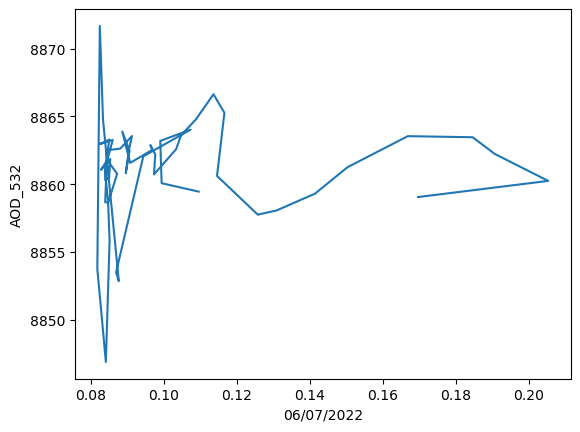

In [72]:
fig, ax = plt.subplots()
ax.plot(subset['AOT_from'], subset['Altitude'])
#ax.set_xscale('log')
ax.set_ylabel('AOD_532')
ax.set_xlabel('06/07/2022')